In [79]:
import pandas as pd
import matplotlib.pylab as plt
import os
import datetime
import operator
from dateutil.parser import parse

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nicholasjones1/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Load and clean CSV of restaurant violations in New York City

In [161]:
df=pd.read_csv('inspections.csv')

In [162]:
print(df.shape)
df=df.dropna(subset=["GRADE DATE"])
print(df.shape)

(34610, 18)
(17531, 18)


In [163]:
df=df[['CUISINE DESCRIPTION','GRADE DATE']]
df=df.rename(columns={'CUISINE DESCRIPTION':'CUISINE'})
df=df.rename(columns={'GRADE DATE':'DATE'})
df=df.reset_index(drop=True)
df.head(2)

,CUISINE,DATE
0,Donuts,10/08/2014
1,African,05/18/2016


## Group into seasons and cuisines

In [164]:
df['DATE']=pd.to_datetime(df.DATE)
df.head()

,CUISINE,DATE
0,Donuts,2014-10-08
1,African,2016-05-18
2,Hamburgers,2015-02-27
3,"Latin (Cuban, Dominican, Puerto Rican, South &...",2016-11-01
4,Bangladeshi,2016-05-19


In [167]:
date1 = datetime.date( 2016, 1, 1 )
date2 = datetime.date( 2016, 4, 1 )
date3 = datetime.date( 2016, 7, 1 )
date4 = datetime.date( 2016, 10, 1)
date5 = datetime.date( 2016, 12, 30)


In [184]:
spring = df[(df['DATE'] >= date1) & (df['DATE']<=date2)]
summer = df[(df['DATE'] >= date2) & (df['DATE']<=date3)]
autumn = df[(df['DATE'] >= date3) & (df['DATE']<=date4)]
winter = df[(df['DATE'] >= date4) & (df['DATE']<=date5)]

In [180]:
spring.head()

,CUISINE,DATE
5,American,2016-02-16
11,Bakery,2016-03-29
26,Mexican,2016-01-09
38,American,2016-03-03
44,"Latin (Cuban, Dominican, Puerto Rican, South &...",2016-02-23


## Plot pie charts

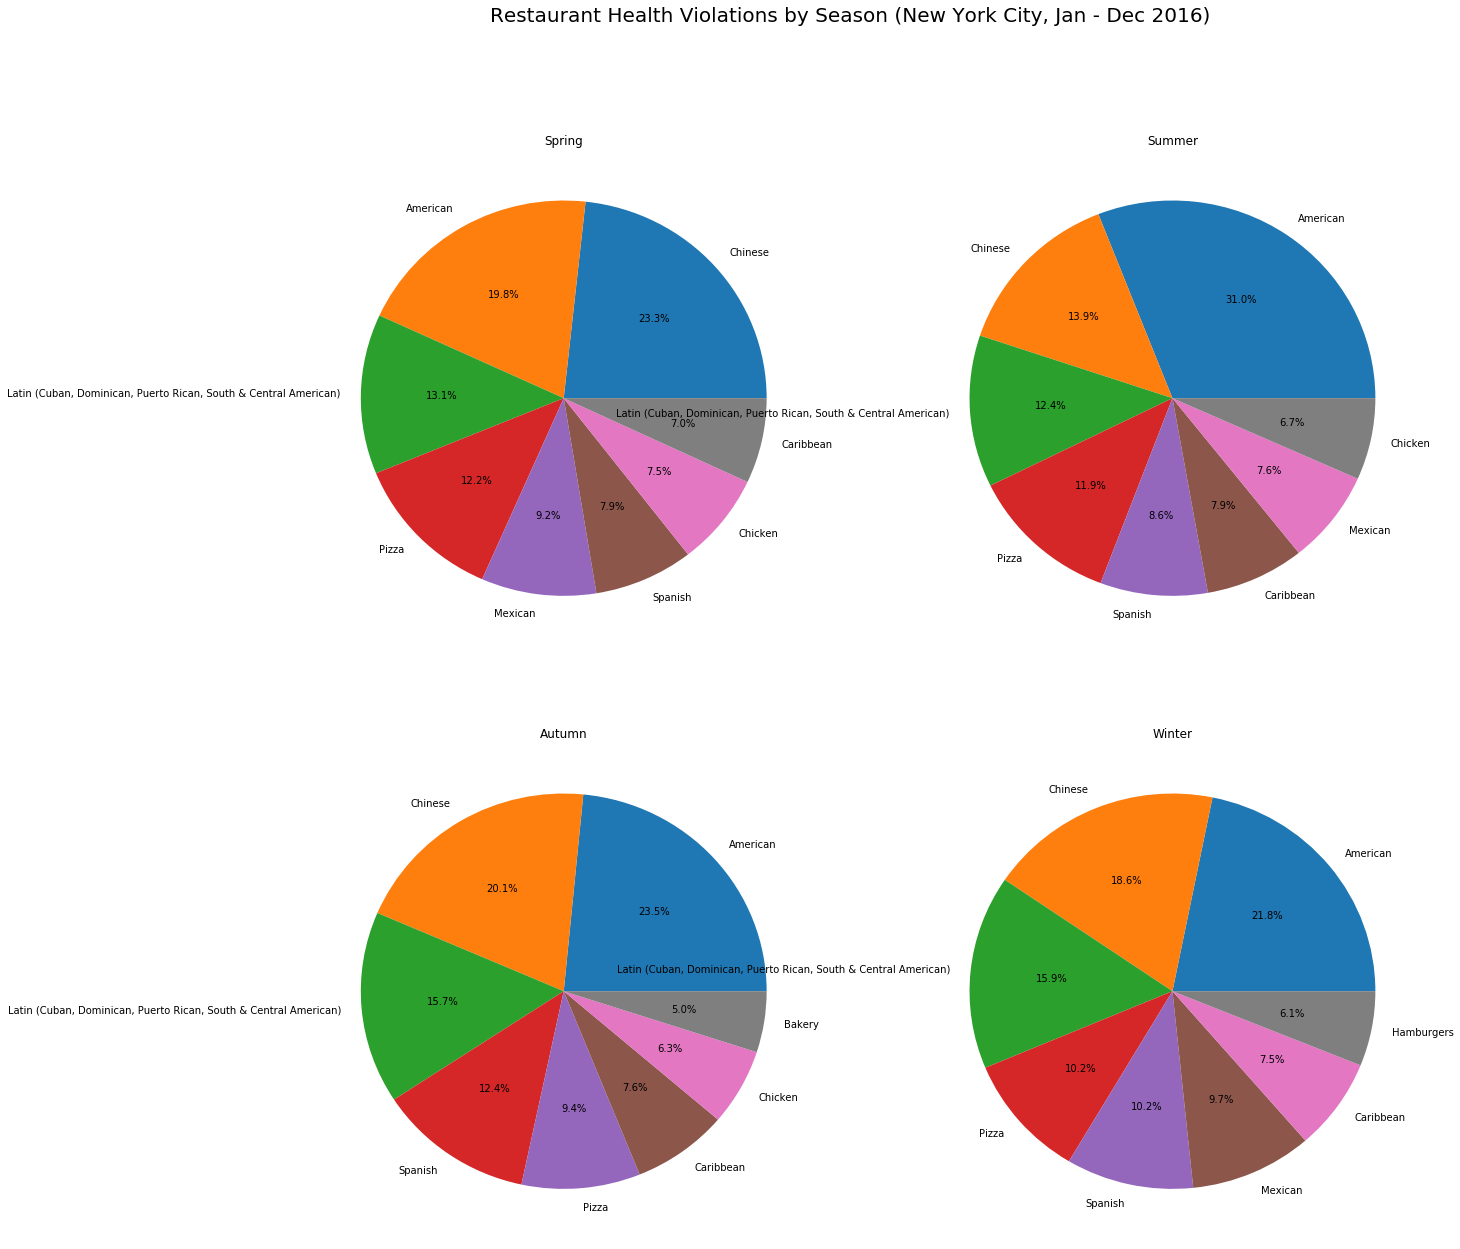

In [191]:

fig = plt.figure(figsize = (20,20))
fig.suptitle('Restaurant Health Violations by Season (New York City, Jan - Dec 2016)', fontsize=20)

# Spring

mydict = dict(zip(spring.groupby('CUISINE')['DATE'].count().index, 
         spring.groupby('CUISINE')['DATE'].count().values))

a=sorted(mydict.items(), key=operator.itemgetter(1), reverse=True)[:8]
counts = pd.DataFrame(a, columns=['cuisine','counts'])

labels = counts.cuisine[:8]
fracs = counts.counts[:8]

ax1 = fig.add_subplot(2,2,1)
ax1.pie(counts.counts, labels=counts.cuisine, autopct='%1.1f%%');
ax1.set_title('Spring')

# Summer

mydict = dict(zip(summer.groupby('CUISINE')['DATE'].count().index, 
         summer.groupby('CUISINE')['DATE'].count().values))

a=sorted(mydict.items(), key=operator.itemgetter(1), reverse=True)[:8]
counts = pd.DataFrame(a, columns=['cuisine','counts'])

labels = counts.cuisine[:8]
fracs = counts.counts[:8]

ax2 = fig.add_subplot(2,2,2)
ax2.pie(counts.counts, labels=counts.cuisine, autopct='%1.1f%%');
ax2.set_title('Summer')

# Autumn

mydict = dict(zip(autumn.groupby('CUISINE')['DATE'].count().index, 
         autumn.groupby('CUISINE')['DATE'].count().values))

a=sorted(mydict.items(), key=operator.itemgetter(1), reverse=True)[:8]
counts = pd.DataFrame(a, columns=['cuisine','counts'])

labels = counts.cuisine[:8]
fracs = counts.counts[:8]

ax3 = fig.add_subplot(2,2,3)
ax3.pie(counts.counts, labels=counts.cuisine, autopct='%1.1f%%');
ax3.set_title('Autumn')

# Winter

mydict = dict(zip(winter.groupby('CUISINE')['DATE'].count().index, 
         winter.groupby('CUISINE')['DATE'].count().values))

a=sorted(mydict.items(), key=operator.itemgetter(1), reverse=True)[:8]
counts = pd.DataFrame(a, columns=['cuisine','counts'])

labels = counts.cuisine[:8]
fracs = counts.counts[:8]

ax4 = fig.add_subplot(2,2,4)
ax4.pie(counts.counts, labels=counts.cuisine, autopct='%1.1f%%');
ax4.set_title('Winter');

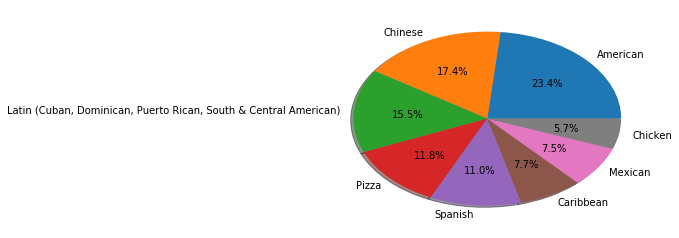